In [9]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from SimpleCNN import SimpleCNN
from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [10]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.8
OVERLAP_THRESHOLD = 0.65
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 20
DEVICE = 'cuda:0'

We will compare with out best model yet the model00 regnet for week2 dir 00_no_movmetn

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 417, Gyro: 417
Bout shape - Acc: 446, Gyro: 446
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 499, Gyro: 499
Bout shape - Acc: 450, Gyro: 450
Bout shape - Acc: 740, Gyro: 740
Bout shape - Acc: 445, Gyro: 445
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 687, Gyro: 687
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 799, Gyro: 799
Bout shape - Acc: 624, Gyro: 624
Bout shape - Acc: 469, Gyro: 469
Bout shape - Acc: 456, Gyro: 456
Bout shape - Acc: 430, Gyro: 430
Bout shape - Acc: 1325, Gyro: 1325
Bout shape - Acc: 416, Gyro: 416
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


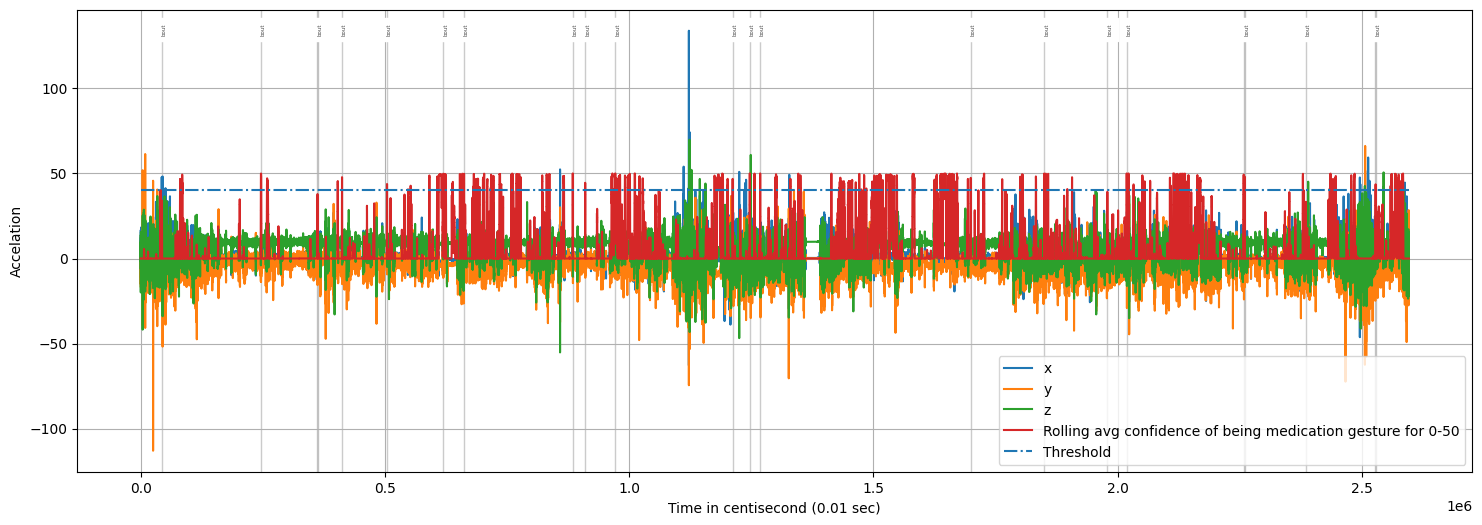

There are 321 FP's of 6489 total windows (FP is -> confidance over: 0.8 and less that 65.0% overlap with a real bout)
FP's are at rate of 4.95%
Fn's are at rate of 0.1849%
Normalized on True


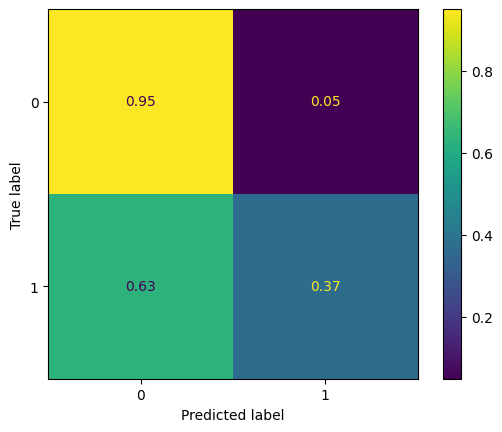

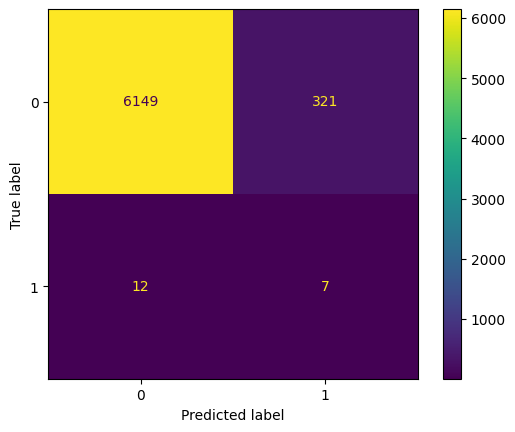

In [11]:
#load model00
model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
model = RegNet()
model.load_state_dict(torch.load(model00_path))

#get false postive count

TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 625, Gyro: 625
Bout shape - Acc: 445, Gyro: 445
Bout shape - Acc: 467, Gyro: 467
Bout shape - Acc: 500, Gyro: 500
Bout shape - Acc: 446, Gyro: 446
Bout shape - Acc: 470, Gyro: 470
Bout shape - Acc: 410, Gyro: 410
Bout shape - Acc: 445, Gyro: 445
Bout shape - Acc: 414, Gyro: 414
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 484, Gyro: 484
Bout shape - Acc: 434, Gyro: 434
Bout shape - Acc: 554, Gyro: 554
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 793, Gyro: 793
Bout shape - Acc: 468, Gyro: 468
Bout shape - Acc: 490, Gyro: 490
Bout shape - Acc: 487, Gyro: 487
Bout shape - Acc: 499, Gyro: 499
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


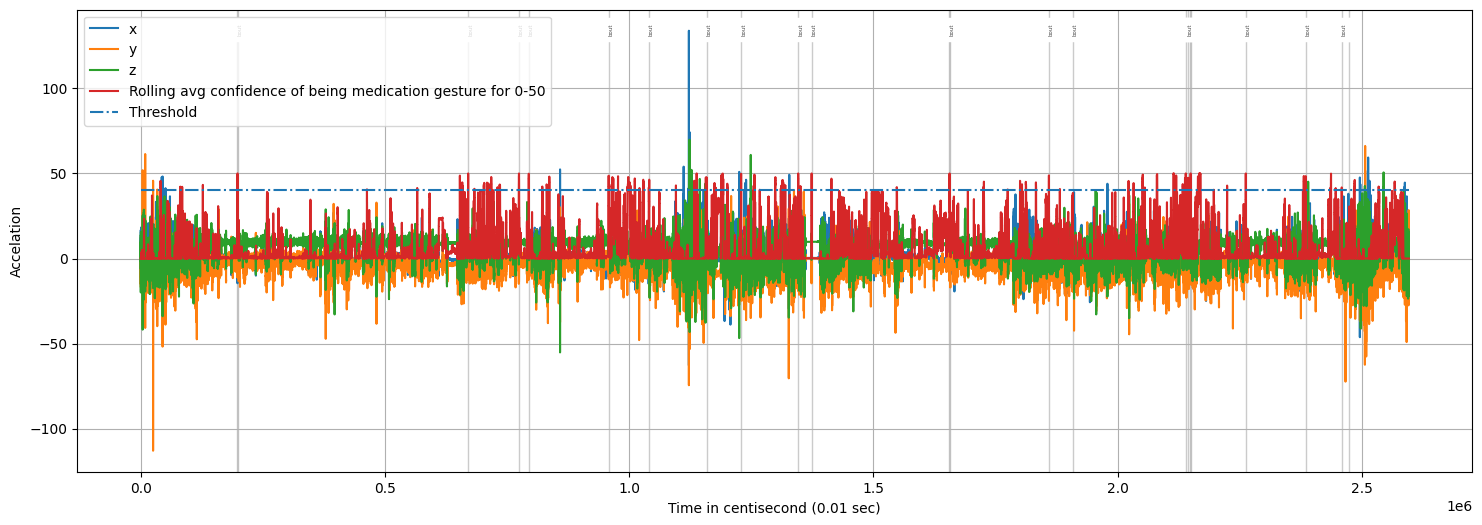

There are 102 FP's of 6489 total windows (FP is -> confidance over: 0.8 and less that 65.0% overlap with a real bout)
FP's are at rate of 1.57%
Fn's are at rate of 0.1233%
Normalized on True


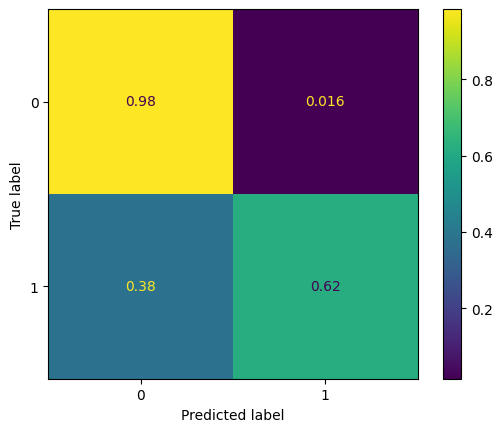

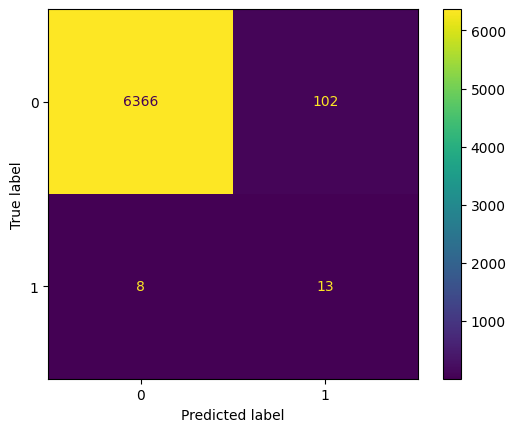

In [12]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week03/00_no_movment/95f1_with_filter_NOMovments_simpcnn.pth'
model = SimpleCNN()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

Lets go our best model yet!!!!!